<a href="https://colab.research.google.com/github/Shams-Simanto/PyTut/blob/main/pytut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
print("hello")

hello


Using device: cuda


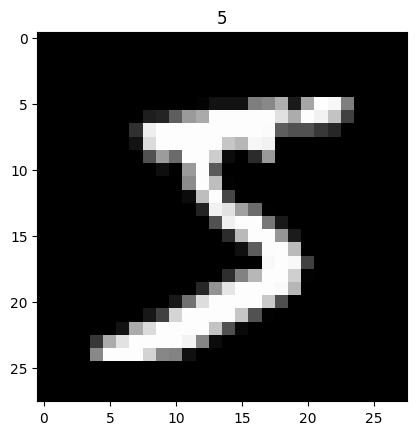

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1, TrainLoss: 0.24162369966506958
Train Accuracy: 0.9296666979789734
Epoch 2, TrainLoss: 0.16270887851715088
Train Accuracy: 0.9549833536148071
Epoch 3, TrainLoss: 0.14354251325130463
Train Accuracy: 0.9607000350952148
Test Loss: 0.17525383830070496
Test Accuracy: 0.9571685194969177
Total time taken to train the model: 33.063619604999985 seconds


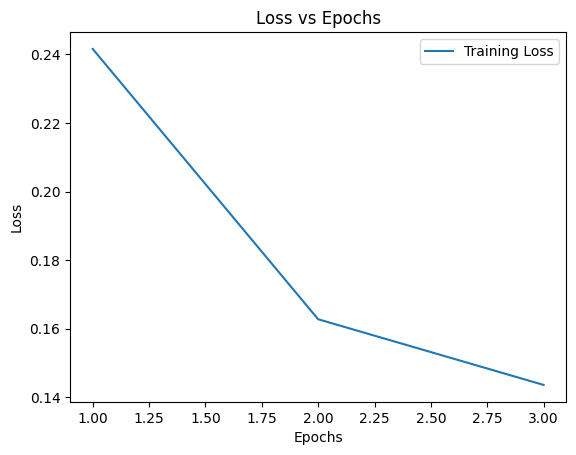

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchmetrics as tm


import torchvision.transforms as transforms
import torchvision.datasets as datasets


from torch.utils.data import DataLoader

from timeit import default_timer as timer
from tqdm.auto import tqdm # progress bar for training loop

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


### 1. getting the data

train_data = datasets.MNIST(root='data', # directory to save the data
                            train=True, # get the training data
                            download=True, # download the data if not already present
                            transform=transforms.ToTensor() # convert the data to tensor
                            )

test_data = datasets.MNIST(root='data', # directory to save the data
                           train=False, # get the test data
                           download=True, # download the data if not already present
                           transform=transforms.ToTensor() # convert the data to tensor
                           )


# len(train_data), len(test_data) # 60000, 10000

# train_data.classes # 0-9 (10 classes)

# train_data.class_to_idx # {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

# train_data.data.shape # torch.Size([60000, 28, 28]) (60000 samples, 28x28 pixels)

# train_data[0][0].shape # torch.Size([1, 28, 28]) (1 channel, 28x28 pixels)

# torch.rand(1, 28, 28).shape # torch.Size([1, 28, 28]) (1 channel, 28x28 pixels)

image, label = train_data[0] # get the first image and label

image.shape # torch.Size([1, 28, 28]) (1 channel, 28x28 pixels)
label # 5 (label of the image)


plt.imshow(image[0], cmap='gray') # plot the image ; only heights and widths
# not the channels


plt.title(label) # plot the label
plt.show()

type(train_data) # <class 'torchvision.datasets.mnist.MNIST'>


### 2. Prepare data loader

BATCH_SIZE = 32
train_loader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE, # batch to get the data in batches of 32 samples
                          shuffle=True # shuffle the data to get random samples in each batch
                          # and the model will not learn the order of the data
                        )

test_loader = DataLoader(dataset=test_data,
                         batch_size=BATCH_SIZE,
                         shuffle=False # do not shuffle the data for test data
                        )

# batch to be more computationally efficient and faster
# batch to process 32 samples at a time instead of 60000 samples at once
# batch to reduce the memory usage and speed up the training process


len(train_loader), len(test_loader) # 1875, 313 (60000/32, 10000/32)

### 3. Create a baseline model

# create a flattern layer

flattern_model= nn.Flatten() # flatten the image to 1D tensor
# 28x28x1=784 (1 channel)


class MNIST (nn.Module): #subclass of nn.Module
    def __init__(self):
        super().__init__()
        self.flatten= nn.Flatten()
        self.layer1= nn.Linear(in_features=28*28, out_features=128)
        # input layer with 784 neurons and hidden layer with 128 neurons
        self.layer2= nn.Linear(in_features=128, out_features=10)
        # hidden layer with 128 neurons and output layer with 10 neurons (10 classes)
        self.relu= nn.ReLU()

    def forward(self, x):
        return self.layer2(self.relu(self.layer1(self.flatten(x)))) # output of the model


model = MNIST().to(device)

l1= nn.CrossEntropyLoss() #Cross Entropy Loss for multi-class classification problems

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

accuracy = tm.Accuracy(task="multiclass", num_classes=10).to(device)

# for time complexity

def train_time(start, end) :
  total_time= end - start
  print(f'Total time taken to train the model: {total_time} seconds')


torch.manual_seed(42) #set seed for reproducibility
epochs = 3

start_time = timer() # start time
epoch_count = []
train_loss_values = []

for epoch in tqdm(range(epochs)):

  train_loss = 0 # initialize the loss to 0 per batch
  train_accuracy = 0 # initialize the accuracy to 0 per batch

  for batch, (X, y) in enumerate(train_loader): # get the data in batches
    X, y = X.to(device), y.to(device)
    model.train()
    y_logits = model(X)
    loss= l1(y_logits, y)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    train_loss += loss
    train_accuracy += accuracy(y_pred, y.long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  train_loss /= len(train_loader)
  train_accuracy /= len(train_loader)

  print(f'Epoch {epoch+1}, TrainLoss: {train_loss}')
  # average loss per batch

  print(f'Train Accuracy: {train_accuracy}')
  # average accuracy per batch

  train_loss_values.append(train_loss)
  epoch_count.append(epoch+1)


model.eval()

with torch.inference_mode():
    test_loss = 0 # initialize the loss to 0 per batch
    test_accuracy = 0 # initialize the accuracy to 0 per batch

    for batch, (X, y) in enumerate(test_loader): # get the data in batches
        X, y = X.to(device), y.to(device)
        test_logits = model(X)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss += l1(test_logits, y)
        test_accuracy += accuracy(test_pred, y.long())

    test_loss /= len(test_loader) # average loss per batch
    test_accuracy /= len(test_loader) # average accuracy per batch

    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_accuracy}')

end_time = timer() # end time
train_time(start_time, end_time) # total time taken to train the model

plt.figure()
plt.plot(epoch_count, [loss.detach().cpu().numpy() for loss in train_loss_values], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


Using device: cuda


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1, TrainLoss: 0.1489955484867096, TrainAccuracy: 0.9527166485786438
Epoch 2, TrainLoss: 0.04861614480614662, TrainAccuracy: 0.985966682434082
Epoch 3, TrainLoss: 0.03404565155506134, TrainAccuracy: 0.9899333715438843
Test Loss: 0.035455457866191864, Test Accuracy: 0.9901158213615417
Total time taken to train the model: 55.32457942099995 seconds


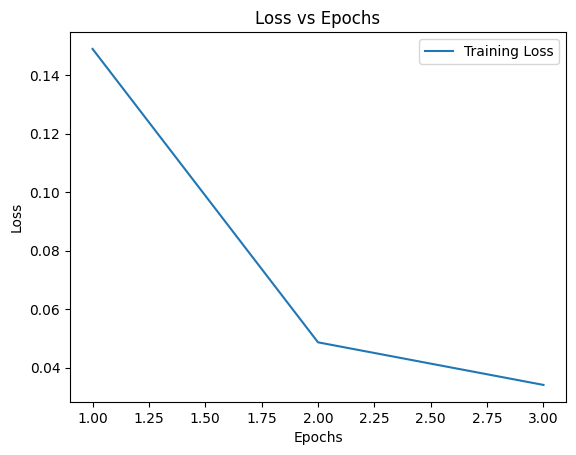

In [ ]:
# CNN best for -> image classification ( visual data )

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from timeit import default_timer as timer
from tqdm.auto import tqdm
from torchmetrics import Accuracy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



class MNIST2 (nn.Module): #subclass of nn.Module
    def __init__(self):
        super().__init__()
        self.conv_block1= nn.Sequential(
            nn.Conv2d(in_channels=1, # there's only one color channel in the image (grayscale)
                      # 3 channels for RGB images
                      # 1 channel for grayscale images
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1), # 1 channel to 16 channels
            nn.ReLU(),
            nn.Conv2d(in_channels=16,
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.conv_block2= nn.Sequential(
            nn.Conv2d(in_channels=16,
                      out_channels=32,
                      kernel_size=3,
                      stride=1,
                      padding=1), # 16 channels to 32 channels
            nn.ReLU(),
            nn.Conv2d(in_channels=32,
                      out_channels=32,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier= nn.Sequential( # output layer
            nn.Flatten(),
            nn.Linear(in_features= 32*7*7, out_features=16*16*16),
            # Adjusted in_features
            # 32 ---> new color channels
            # 7  ---> height(28/(2*2)) ; weight(28/(2*2)) for dividing by kernel
            # size (2) 2 times (conv_block1, conv_block2)

            nn.ReLU(),
            nn.Linear(in_features=16*16*16, out_features=16*16),
            nn.ReLU(),
            nn.Linear(in_features=16*16, out_features=10), # 10 classes

            # self.classifier is the same as before
        )

    def forward(self, x):
        return self.classifier(self.conv_block2(self.conv_block1(x)))


model =  MNIST2().to(device)


# nn.Conv2d() ----> returns the output of the convolutional layer
# the length of color channel part of the image is changed to the number of filters

# 1. in_channels: number of input channels (1 for grayscale images, 3 for RGB images)
# 2. out_channels: number of output channels (number of filters)
# 3. kernel_size: size of the filter (3x3, 5x5, etc.)
# 4. stride: step size of the filter (1, 2, etc.)
# 5. padding: number of pixels to add to the input image (0, 1, etc.)



# nn.MaxPool2d() ----> returns the maximum value in the kernel size matrix
# thus the height and width of the image is reduced to height/kernel size
# and width/kernel size

# 1. kernel_size: size of the filter (2x2, 3x3, etc.)

l1= nn.CrossEntropyLoss()

optimizer= torch.optim.Adam(model.parameters(), lr= 0.001)

accuracy = tm.Accuracy(task="multiclass", num_classes=10).to(device)

def train_time(start, end) :
  total_time= end - start
  print(f'Total time taken to train the model: {total_time} seconds')



torch.manual_seed(42)

epochs = 3

epoch_count = []
train_loss_values = []

start_time = timer()

for epoch in tqdm(range(epochs)):

    train_loss = 0
    train_accuracy=0

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        model.train()
        y_logits = model(X)
        y_pred= torch.softmax(y_logits, dim=1).argmax(dim=1)
        loss= l1(y_logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_accuracy += accuracy(y_pred, y.long())
        train_loss += loss

    train_loss /= len(train_loader)
    train_accuracy /= len(train_loader)

    print(f'Epoch {epoch+1}, TrainLoss: {train_loss}, TrainAccuracy: {train_accuracy}')

    train_loss_values.append(train_loss)
    epoch_count.append(epoch+1)

model.eval()

with torch.inference_mode():
    test_loss = 0
    test_accuracy=0

    for batch, (X, y) in enumerate(test_loader):
        X, y = X.to(device), y.to(device)
        test_logits = model(X)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss += l1(test_logits, y)
        test_accuracy += accuracy(test_pred, y.long())

    test_loss /= len(test_loader)
    test_accuracy /= len(test_loader)

    print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

end_time = timer()
train_time(start_time, end_time)

plt.figure()
plt.plot(epoch_count, [loss.detach().cpu().numpy() for loss in train_loss_values], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()